# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | natal
Processing Record 2 of Set 1 | hadibu
Processing Record 3 of Set 1 | sirathu
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | yuzhno-kurilsk
Processing Record 6 of Set 1 | fuglafjordur
Processing Record 7 of Set 1 | gua musang
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | trairi
Processing Record 12 of Set 1 | nishifukuma
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | regina
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | camana
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | labrador city
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | puerto san carlos
City no

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,natal,-5.7950,-35.2094,27.12,78,0,2.06,BR,1683855581
1,hadibu,12.6500,54.0333,28.20,74,100,1.08,YE,1683855584
2,sirathu,25.6500,81.3167,31.61,11,0,2.69,IN,1683855584
3,isafjordur,66.0755,-23.1240,6.69,94,100,1.85,IS,1683855584
4,yuzhno-kurilsk,44.0306,145.8556,7.24,66,10,3.51,RU,1683855584


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,natal,-5.7950,-35.2094,27.12,78,0,2.06,BR,1683855581
1,hadibu,12.6500,54.0333,28.20,74,100,1.08,YE,1683855584
2,sirathu,25.6500,81.3167,31.61,11,0,2.69,IN,1683855584
3,isafjordur,66.0755,-23.1240,6.69,94,100,1.85,IS,1683855584
4,yuzhno-kurilsk,44.0306,145.8556,7.24,66,10,3.51,RU,1683855584


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

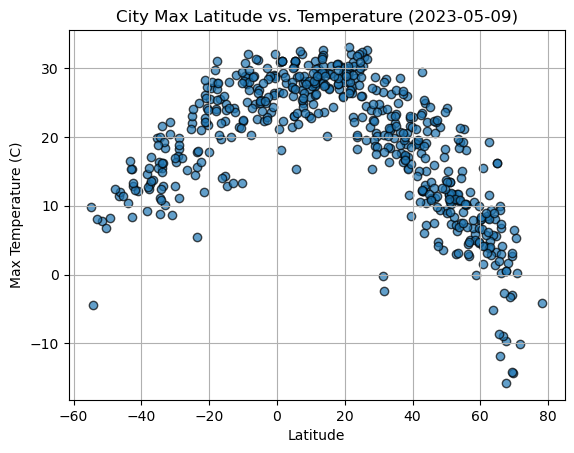

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"], 
            edgecolors='black',
            alpha=0.7
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-05-09)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

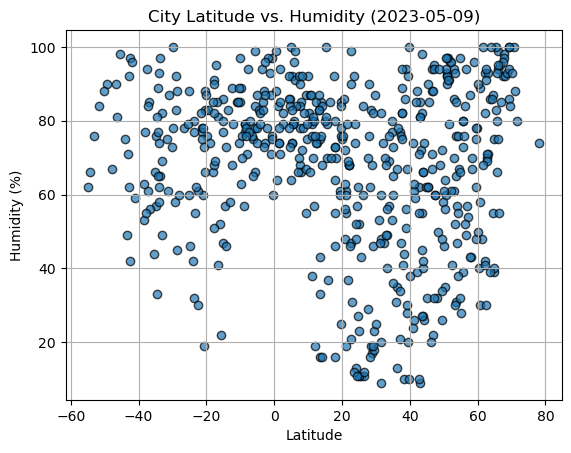

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"], 
            edgecolors='black',
            alpha=0.7
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-05-09)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

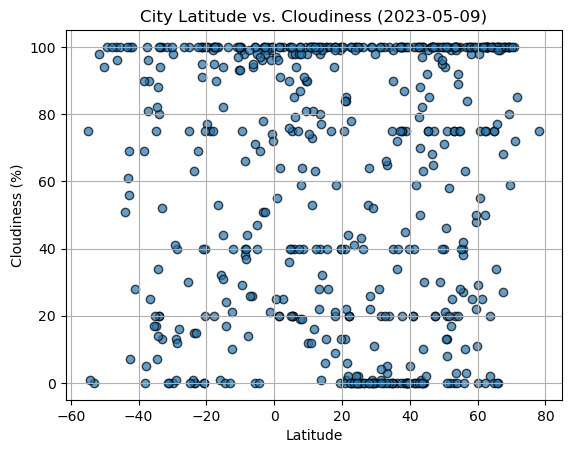

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"], 
            edgecolors='black',
            alpha=0.7
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-05-09)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

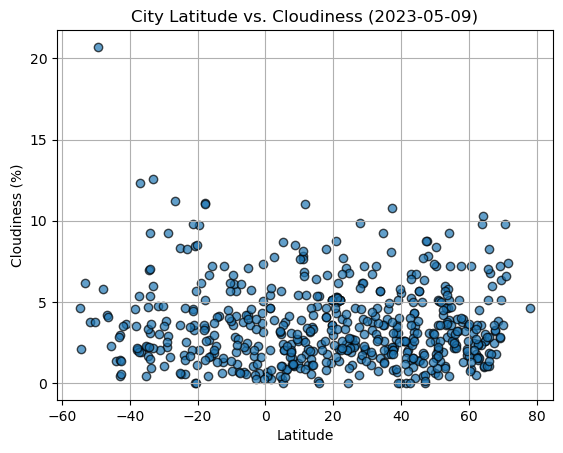

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"], 
            edgecolors='black',
            alpha=0.7
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-05-09)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def linear_agression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define function for annotating (doesn't work if don't define function in this cell with line_eq)
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hadibu,12.6500,54.0333,28.20,74,100,1.08,YE,1683855584
2,sirathu,25.6500,81.3167,31.61,11,0,2.69,IN,1683855584
3,isafjordur,66.0755,-23.1240,6.69,94,100,1.85,IS,1683855584
4,yuzhno-kurilsk,44.0306,145.8556,7.24,66,10,3.51,RU,1683855584
5,fuglafjordur,62.2440,-6.8140,8.26,82,50,1.76,FO,1683855584


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,natal,-5.7950,-35.2094,27.12,78,0,2.06,BR,1683855581
7,port mathurin,-19.6833,63.4167,25.54,76,77,9.71,MU,1683855585
8,edinburgh of the seven seas,-37.0676,-12.3116,17.13,85,90,12.33,SH,1683855585
9,adamstown,-25.0660,-130.1015,22.05,60,100,8.32,PN,1683855585
10,trairi,-3.2778,-39.2689,24.90,85,51,1.67,BR,1683855517


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8406871817839711


Text(0, 0.5, 'Max Temp')

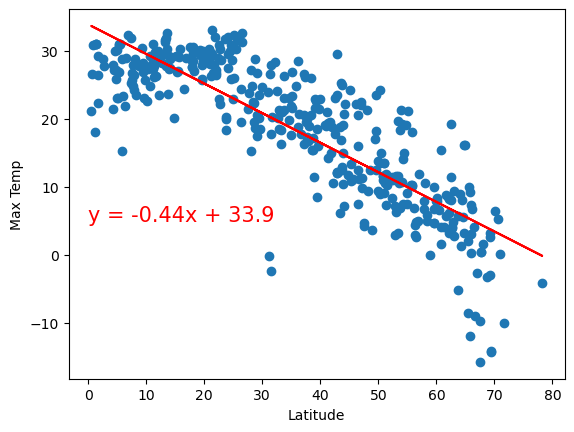

In [73]:
# Linear regression on Northern Hemisphere
equation = linear_agression(northern_hem_df["Lat"], northern_hem_df["Max Temp"])

annotate(equation, 0, 5)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

The r-value is: 0.8008207307324245


Text(0, 0.5, 'Max Temp')

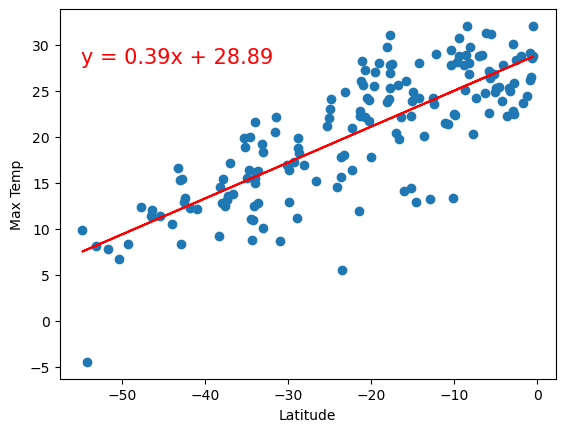

In [62]:
# Linear regression on Southern Hemisphere
equation = linear_agression(southern_hem_df["Lat"], southern_hem_df["Max Temp"])

annotate(equation, -55, 28)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:** 
 - There appears to be a decently strong negative correlation between max temperature and latitude in the Northern Hemisphere, with an r-value of -0.84.
 - In the opposite fashion, there is a fairly strong positive correlation between max temperature and latitude in the Southern Hemisphere, with an r-value of 0.80.
 - These correlations make logical sense, since the further away from the equator (0 value) the latitude is, the colder the temperature gets. These graphs indicate that there are max temperatures that each latitude has historically reached.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.027649953907512664


Text(0, 0.5, 'Humidity')

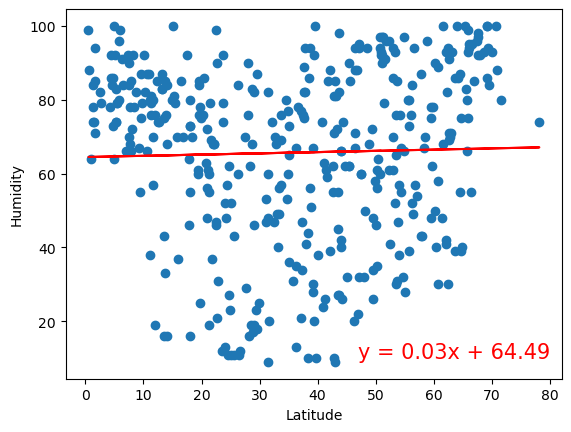

In [63]:
# Northern Hemisphere
equation = linear_agression(northern_hem_df["Lat"], northern_hem_df["Humidity"])

annotate(equation, 47, 10)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is: 0.152604443305131


Text(0, 0.5, 'Humidity')

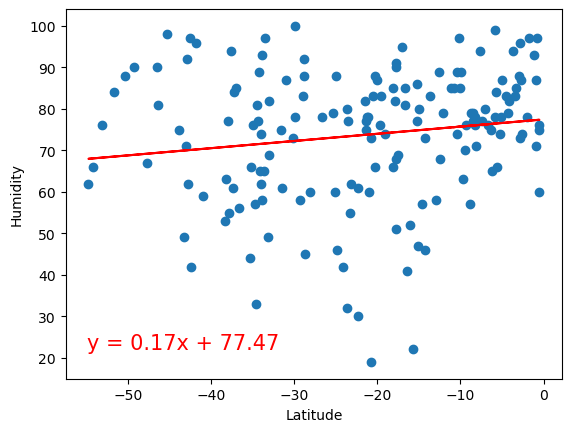

In [64]:
# Southern Hemisphere
equation = linear_agression(southern_hem_df["Lat"], southern_hem_df["Humidity"])

annotate(equation, -55, 22)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** 
 - There is no correlation between latitude and humidity in the Nothern Hemisphere, since there's an r-value of 0.03 (way too small).
 - The Southern Hemisphere has a slightly strong correlation between latitude and humidity, with an r-value of 0.15, but is still too small a value to be considered a true correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08094484554054948


Text(0, 0.5, 'Cloudiness')

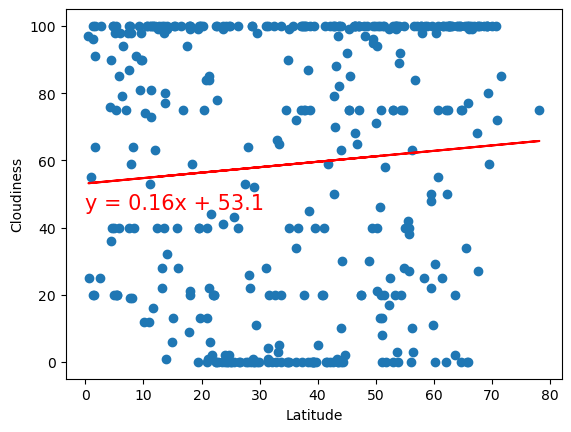

In [65]:
# Northern Hemisphere
equation = linear_agression(northern_hem_df["Lat"], northern_hem_df["Cloudiness"])

annotate(equation, 0, 45.5)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is: 0.11173118527229085


Text(0, 0.5, 'Cloudiness')

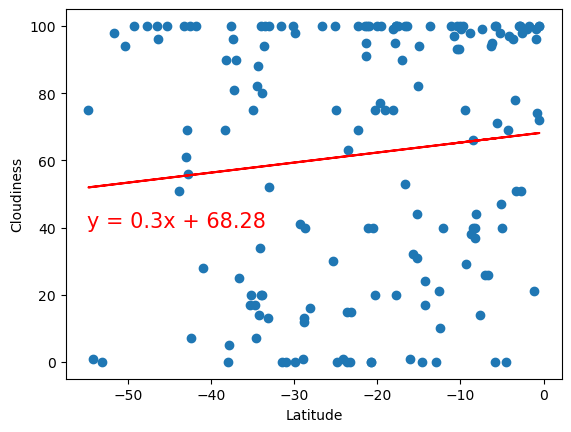

In [66]:
# Southern Hemisphere
equation = linear_agression(southern_hem_df["Lat"], southern_hem_df["Cloudiness"])

annotate(equation, -55, 40)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** 
- Neither the Northern nor Southern Hemispheres have a correlation between latitude and cloudiness, with r-values of 0.08 and 0.11, respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05478266970240921


Text(0, 0.5, 'Wind Speed')

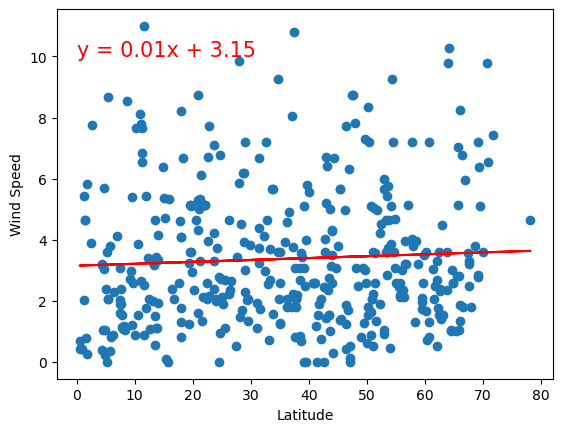

In [67]:
# Northern Hemisphere
equation = linear_agression(northern_hem_df["Lat"], northern_hem_df["Wind Speed"])

annotate(equation, 0, 10)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is: -0.13177139515059882


Text(0, 0.5, 'Wind Speed')

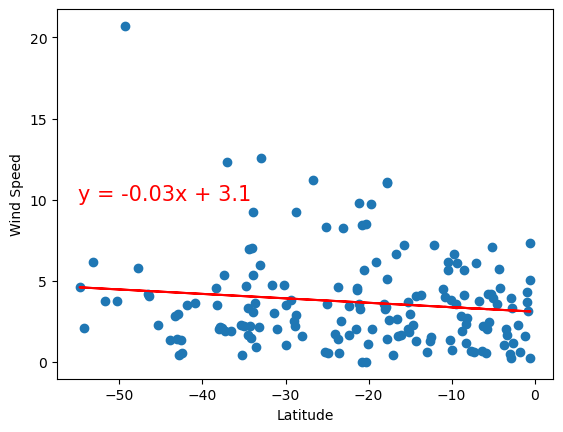

In [69]:
# Southern Hemisphere
equation = linear_agression(southern_hem_df["Lat"], southern_hem_df["Wind Speed"])

annotate(equation, -55, 10)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** 
 - Again, neither the Northern nor Southern Hemispheres have a correlation between latitude and cloudiness. 
 - However, it should be noted that the Northern Hemisphere has a barely positive correlation of 0.05, whereas the Southern Hemisphere has a slightly negative correlation of -0.13.